In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.metrics import classification_report, precision_score, f1_score, recall_score, confusion_matrix, precision_score, accuracy_score, roc_auc_score
from yellowbrick.classifier.rocauc import roc_auc

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

# **Comprension del problema**

El problema abordado es un problema de machine learning de tipo supervisado el cual corresponde a una clasificación multiclase en la que se pretende determinar si un feto con ciertas características extraídas de cardiotocografias pertenece a una de las tres clases: Normal, Sospechoso y Patológico, el campo de aplicación principal es medicina, específicamente en la rama de obstetricia.

In [ ]:
url = "https://datahub.io/machine-learning/diabetes/r/diabetes.csv"
# db = pd.read_csv('/content/fetal_health.csv')
data = pd.read_csv(url)
x = db.drop(["fetal_health"],axis=1)
y = db['fetal_health']
print(data)

## **Variables del sistema**


In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
db.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [ ]:
db.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


Con la información proporcionada se observa que los datos no estan escalados, por lo que se debe realizar un escalamiento de los datos para obtener un mejor modelo

## **Busqueda de datos faltantes**

In [ ]:
db.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

Con lo anterior se concluye que no hay datos faltantes en el data set, lo que es bueno para nuestro modelo

## **Distribucion de clases**

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


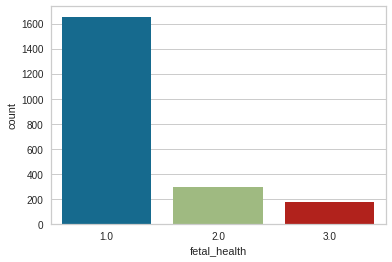

In [ ]:
sns.countplot(x='fetal_health', data=db)
print(db['fetal_health'].value_counts())

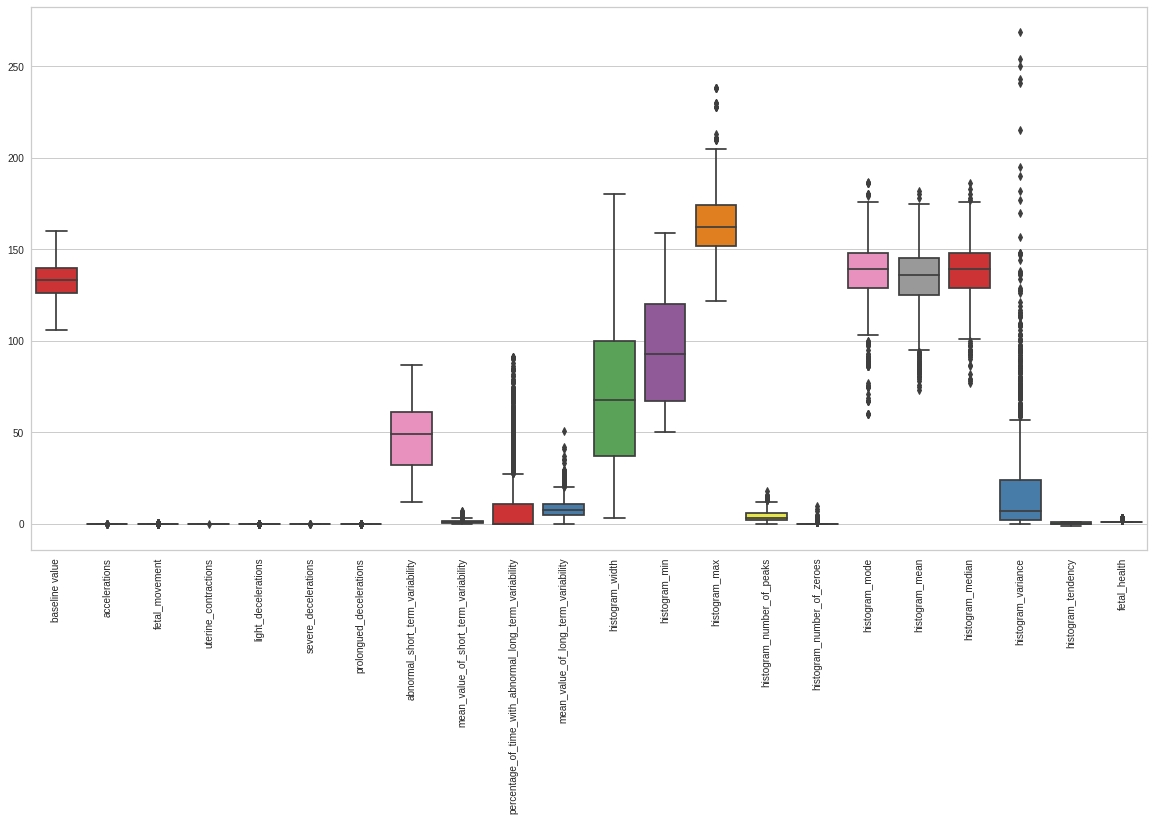

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data = db,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

Con la graficá se observa un gran desbalance entre las clases, es por esto que se debe realizar un balance entre ellas

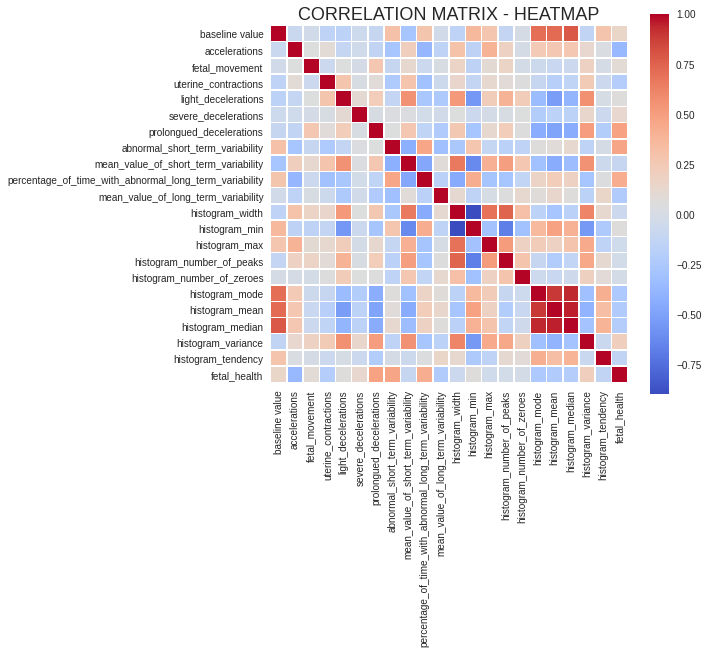

In [ ]:
db_copy = db.copy()
corr = db_copy.corr()
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

Al momento de hacer una seleccion de caracteristicas existe la posibilidad de que alguna de las variables histogram_mode, histogram_mean, histogram_median sean las primeras opciones a descartar por su alta correlacion.

# **Escalamiento de datos**

In [ ]:
X = db.drop(["fetal_health"],axis=1)
Xm = db.drop(["fetal_health"],axis=1)
Y = db["fetal_health"]
Ym = db["fetal_health"]

## **Escalamiento estandar**

son 1488 filas en entrenamiento
son 638 filas en prueba


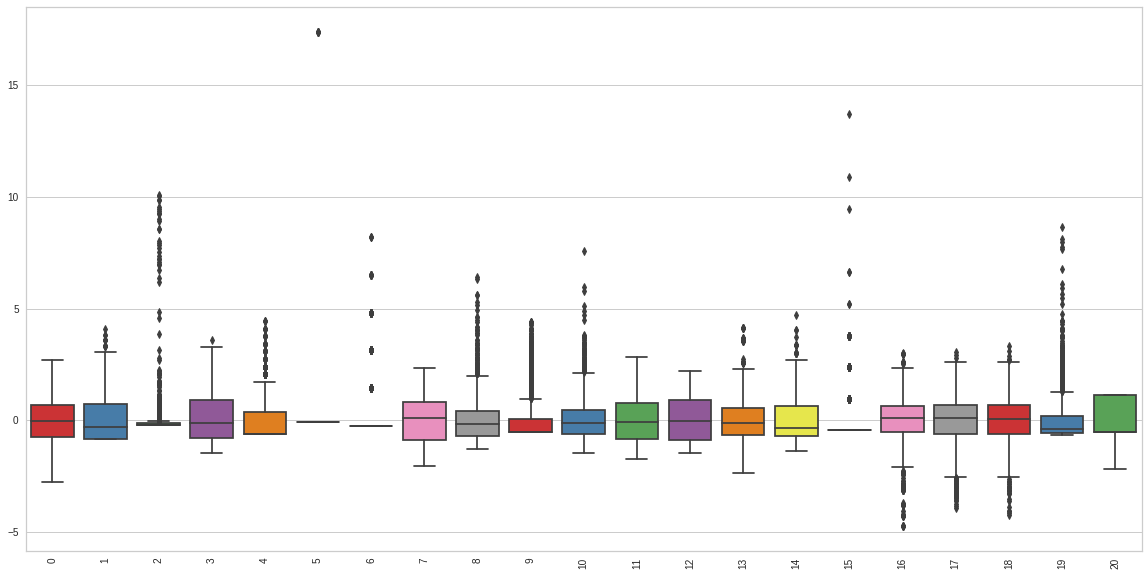

In [ ]:
std_scale = StandardScaler()
X_sc = std_scale.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_sc, Y, test_size=0.3)
print("son "+str(len(X_train))+" filas en entrenamiento")
print("son "+str(len(X_test))+" filas en prueba")

dataFrameStandar = pd.DataFrame(X_sc, columns = ['baseline value','accelerations','fetal_movement','uterine_contractions','light_decelerations','severe_decelerations','prolongued_decelerations','abnormal_short_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability','mean_value_of_long_term_variability','histogram_width','histogram_min','histogram_max','histogram_number_of_peaks','histogram_number_of_zeroes','histogram_mode','histogram_mean','histogram_median','histogram_variance','histogram_tendency'])
dataFrameStandar['fetal_health'] = Y
plt.figure(figsize=(20,10))
sns.boxplot(data = X_sc,palette = "Set1")
plt.xticks(rotation=90)
plt.show()


## **Escalamiento MinMax**

son 1488 filas en entrenamiento
son 638 filas en prueba


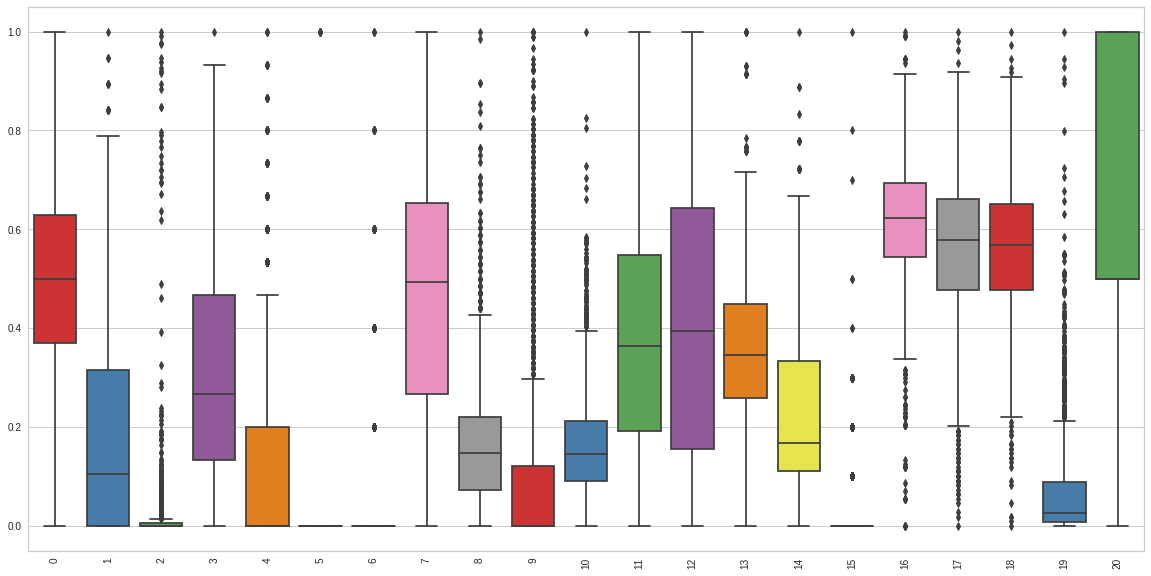

In [13]:
minmax_scale = MinMaxScaler()
X_minmax = minmax_scale.fit_transform(Xm)
X_trainM, X_testM, y_trainM,y_testM = train_test_split(X_minmax, Ym, test_size=0.3)
print("son "+str(len(X_trainM))+" filas en entrenamiento")
print("son "+str(len(X_testM))+" filas en prueba")

dbMinMax = pd.DataFrame(X_minmax, columns = ['baseline value','accelerations','fetal_movement','uterine_contractions','light_decelerations','severe_decelerations','prolongued_decelerations','abnormal_short_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability','mean_value_of_long_term_variability','histogram_width','histogram_min','histogram_max','histogram_number_of_peaks','histogram_number_of_zeroes','histogram_mode','histogram_mean','histogram_median','histogram_variance','histogram_tendency'])
dbMinMax['fetal_health'] = Ym
plt.figure(figsize=(20,10))
sns.boxplot(data = X_minmax,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

#**SMOTE**

Before OverSampling, counts of label '3': 117
Before OverSampling, counts of label '2': 216
Before OverSampling, counts of label '1': 1155 

After OverSampling, counts of label '3': 1155
After OverSampling, counts of label '2': 1155
After OverSampling, counts of label '1': 1155
3.0    1155
2.0    1155
1.0    1155
Name: fetal_health, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


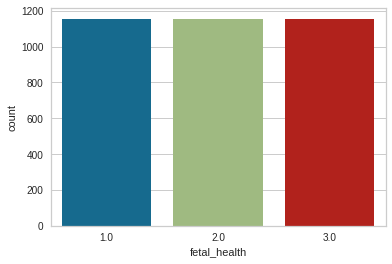

In [11]:
smt = SMOTE()
train_test_split
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
print("Before OverSampling, counts of label '3': {}".format(sum(y_train==3)))
print("Before OverSampling, counts of label '2': {}".format(sum(y_train==2)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(y_train==1)))

print("After OverSampling, counts of label '3': {}".format(sum(y_train_sm==3)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_sm==2)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm==1)))

db_Smote = pd.DataFrame(X_train_sm, columns = ['baseline value','accelerations','fetal_movement','uterine_contractions','light_decelerations','severe_decelerations','prolongued_decelerations','abnormal_short_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability','mean_value_of_long_term_variability','histogram_width','histogram_min','histogram_max','histogram_number_of_peaks','histogram_number_of_zeroes','histogram_mode','histogram_mean','histogram_median','histogram_variance','histogram_tendency'])
db_Smote['fetal_health'] = y_train_sm
sns.countplot(x='fetal_health', data=db_Smote)
print(db_Smote['fetal_health'].value_counts())

Before OverSampling, counts of label '3': 125
Before OverSampling, counts of label '2': 218
Before OverSampling, counts of label '1': 1145 

After OverSampling, counts of label '3': 1145
After OverSampling, counts of label '2': 1145
After OverSampling, counts of label '1': 1145
2.0    1145
1.0    1145
3.0    1145
Name: fetal_health, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


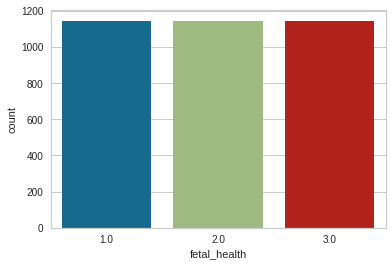

In [17]:
smt2 = SMOTE()
X_train_smM, y_train_smM = smt2.fit_resample(X_trainM, y_trainM)
print("Before OverSampling, counts of label '3': {}".format(sum(y_trainM==3)))
print("Before OverSampling, counts of label '2': {}".format(sum(y_trainM==2)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(y_trainM==1)))

print("After OverSampling, counts of label '3': {}".format(sum(y_train_smM==3)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_smM==2)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_smM==1)))

db_Smote2 = pd.DataFrame(X_train_smM, columns = ['baseline value','accelerations','fetal_movement','uterine_contractions','light_decelerations','severe_decelerations','prolongued_decelerations','abnormal_short_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability','mean_value_of_long_term_variability','histogram_width','histogram_min','histogram_max','histogram_number_of_peaks','histogram_number_of_zeroes','histogram_mode','histogram_mean','histogram_median','histogram_variance','histogram_tendency'])
db_Smote2['fetal_health'] = y_train_smM
sns.countplot(x='fetal_health', data=db_Smote2)
print(db_Smote2['fetal_health'].value_counts())

# Modelos

In [9]:
def evaluate_model(clf, X_test, y_test, model_name, oversample_type):
  y_pred = clf.predict(X_test)
  microavg = precision_score(y_test, y_pred, average='micro')
  macroavg = precision_score(y_test, y_pred, average='macro')
  f1 = f1_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  precision = precision_score(y_test, y_pred, average='weighted')
  accuracy = accuracy_score(y_test, y_pred)
  return [model_name, oversample_type, microavg, macroavg ,f1, recall, precision, accuracy]

In [ ]:
models = {
    'RandomForest':RandomForestClassifier(),
    'RandomForest400':RandomForestClassifier(max_depth=400),
    'DecisionTrees': DecisionTreeClassifier(),
    'DecisionTrees400': DecisionTreeClassifier(max_depth=400),
    'Multi-layerPerceptron':MLPClassifier(),
    'SupportVectorMachine': svm.SVC()
}

In [ ]:
oversampled_data_std = {
    'STANDAR':[X_train, y_train],
    'STANDARSMOTE':[X_train_sm, y_train_sm],
}

oversampled_data_minmax= {
    'MINMAX':[X_trainM, y_trainM],
    'MINMAXSMOTE':[X_train_smM, y_train_smM],
}

In [ ]:
final_output_std = []
for model_k, model_clf in models.items():
  for data_type, data in oversampled_data_std.items():
    model_clf.fit(data[0], data[1])
    final_output_std.append(evaluate_model(model_clf, X_test, y_test, model_k, data_type))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
final_df_std = pd.DataFrame(final_output_std, columns=['Model', 'DataType','Micro avg', 'Macro avg', 'F1', 'Recall', 'Precision','Accuracy'])
# final_df_std

In [ ]:
final_output_minmax = []
for model_k, model_clf in models.items():
  for data_type, data in oversampled_data_minmax.items():
    model_clf.fit(data[0], data[1])
    final_output_minmax.append(evaluate_model(model_clf, X_testM, y_testM, model_k, data_type))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
final_df_minmax = pd.DataFrame(final_output_minmax, columns=['Model', 'DataType','Micro avg', 'Macro avg', 'F1', 'Recall', 'Precision','Accuracy'])
# final_df_minmax

## **Tabla de modelos con metricas de evaluacion**


In [ ]:
d_final = pd.concat([final_df_std, final_df_minmax])
d_final.sort_values(by='F1', ascending=False)

,Model,DataType,Micro avg,Macro avg,F1,Recall,Precision,Accuracy
1,RandomForest,STANDARSMOTE,0.948276,0.902559,0.948857,0.948276,0.949694,0.948276
3,RandomForest400,STANDARSMOTE,0.945141,0.893691,0.946098,0.945141,0.947756,0.945141
0,RandomForest,STANDAR,0.946708,0.914615,0.945206,0.946708,0.944954,0.946708
1,RandomForest,MINMAXSMOTE,0.942006,0.896317,0.942493,0.942006,0.943139,0.942006
0,RandomForest,MINMAX,0.943574,0.922499,0.942458,0.943574,0.942319,0.943574
2,RandomForest400,STANDAR,0.943574,0.906309,0.942185,0.943574,0.941771,0.943574
3,RandomForest400,MINMAXSMOTE,0.938871,0.892242,0.939383,0.938871,0.940053,0.938871
2,RandomForest400,MINMAX,0.938871,0.911737,0.937798,0.938871,0.937609,0.938871
9,Multi-layerPerceptron,STANDARSMOTE,0.934169,0.861107,0.935996,0.934169,0.939645,0.934169
7,DecisionTrees400,STANDARSMOTE,0.931034,0.864873,0.933252,0.931034,0.937638,0.931034


Mejor modelo por criterio F1: Random forest con escalado estandar y SMOTE

# **Curva ROC**

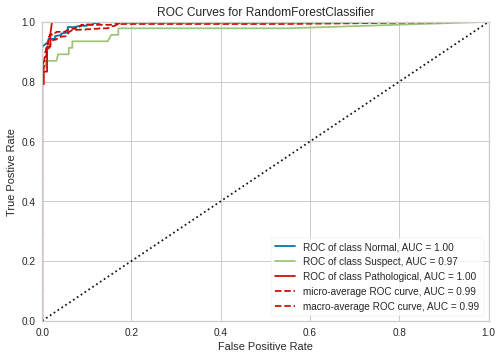

In [ ]:
roc_auc(models.get('RandomForest'), X_train, y_train, X_test=X_test, y_test=y_test, classes=['Normal', 'Suspect', 'Pathological'])

In [ ]:
roc_auc(models.get('RandomForest'), X_trainM, y_trainM, X_test=X_testM, y_test=y_testM, classes=['Normal', 'Suspect', 'Pathological'])

In [ ]:
roc_auc(models.get('RandomForest400'), X_train, y_train, X_test=X_test, y_test=y_test, classes=['Normal', 'Suspect', 'Pathological'])

In [ ]:
roc_auc(models.get('RandomForest400'), X_trainM, y_trainM, X_test=X_testM, y_test=y_testM, classes=['Normal', 'Suspect', 'Pathological'])

In [ ]:
roc_auc(models.get('DecisionTrees'), X_train, y_train, X_test=X_test, y_test=y_test, classes=['Normal', 'Suspect', 'Pathological'])

In [ ]:
roc_auc(models.get('DecisionTrees'), X_trainM, y_trainM, X_test=X_testM, y_test=y_testM, classes=['Normal', 'Suspect', 'Pathological'])

In [ ]:
roc_auc(models.get('DecisionTrees400'), X_train, y_train, X_test=X_test, y_test=y_test, classes=['Normal', 'Suspect', 'Pathological'])

In [ ]:
roc_auc(models.get('DecisionTrees400'), X_trainM, y_trainM, X_test=X_testM, y_test=y_testM, classes=['Normal', 'Suspect', 'Pathological'])

In [ ]:
roc_auc(models.get('Multi-layerPerceptron'), X_train, y_train, X_test=X_test, y_test=y_test, classes=['Normal', 'Suspect', 'Pathological'])

In [ ]:
roc_auc(models.get('Multi-layerPerceptron'), X_trainM, y_trainM, X_test=X_testM, y_test=y_testM, classes=['Normal', 'Suspect', 'Pathological'])

In [ ]:
roc_auc(models.get('SupportVectorMachine'), X_train, y_train, X_test=X_test, y_test=y_test, classes=['Normal', 'Suspect', 'Pathological'])

In [ ]:
roc_auc(models.get('SupportVectorMachine'), X_trainM, y_trainM, X_test=X_testM, y_test=y_testM, classes=['Normal', 'Suspect', 'Pathological'])

# **Matriz de confusion**

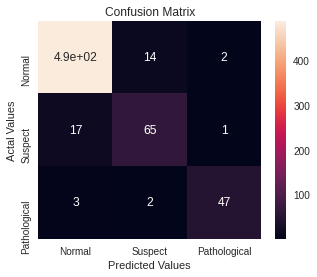

In [ ]:
forest_model = RandomForestClassifier(random_state=42, max_depth=100)
rf_fit = forest_model.fit(X_train, y_train)
y_pred = forest_model.predict(X_test)

# 1
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Normal', 'Suspect', 'Pathological'], 
                     columns = ['Normal', 'Suspect', 'Pathological'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

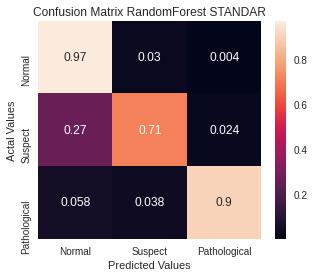

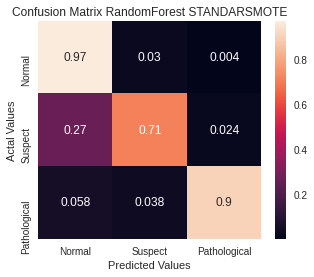

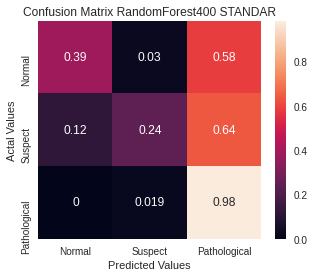

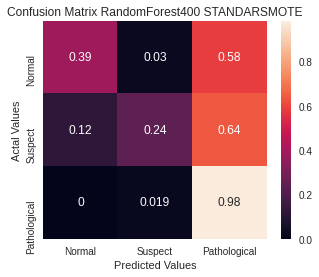

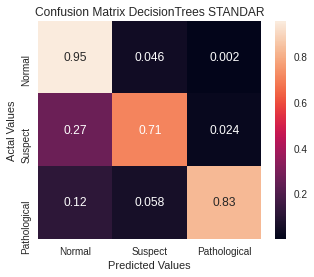

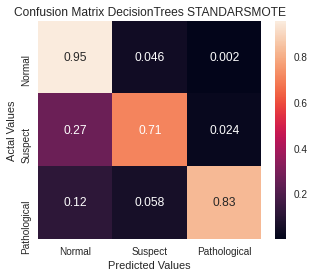

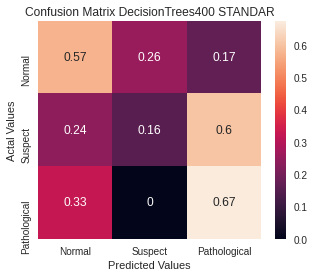

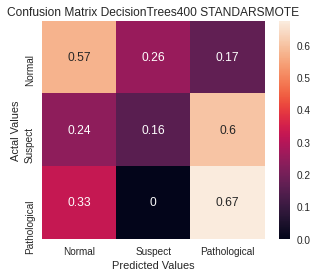

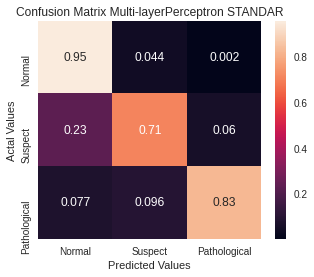

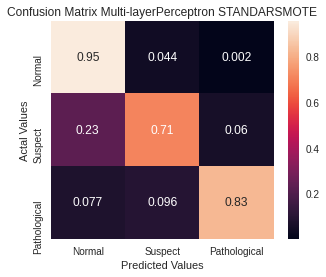

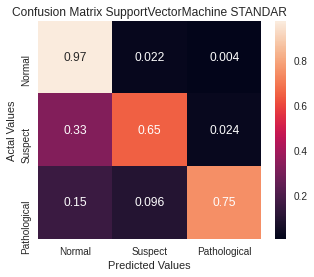

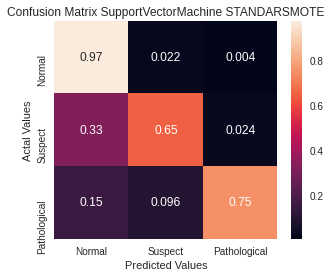

In [ ]:

for model_k, model_clf in models.items():
  for data_type, data in oversampled_data_std.items():
    y_pred = model_clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, normalize='true')
    cm_df = pd.DataFrame(cm,
                        index = ['Normal', 'Suspect', 'Pathological'], 
                        columns = ['Normal', 'Suspect', 'Pathological'])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)

    plt.title('Confusion Matrix ' + model_k + " " + data_type)
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
    print(" ")